# Exploratory Analysis of 911 Calls Data

This project is a data capstone project which is part of Udemy course: [Python for Data Science and Machine Learning](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/) by [Jose Portilla](https://www.udemy.com/user/joseportilla/). In this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert) using python libraries such as pandas, matplotlib and seaborn.

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
**Import libraries and set `%matplotlib inline`**
    
<b>Python predefined (magic) function `%matplotlib inline` is used to enable the inline plotting, where the plots/graphs will be displayed just below the cell where your plotting commands are written.<br>*Source:* [pythonguides.com](https://pythonguides.com/what-is-matplotlib-inline/)

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read Data**<b>
    
Read in the csv file as a dataframe called df

In [82]:
df = pd.read_csv('911.csv')

<br>**df DataFrame Summary**<br>

Check the head of df

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Check info() of df dataframe

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          86637 non-null  float64       
 4   title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   twp          99449 non-null  object        
 7   addr         98973 non-null  object        
 8   e            99492 non-null  int64         
 9   reason       99492 non-null  object        
 10  Day of Week  99492 non-null  object        
 11  Month        99492 non-null  int64         
 12  Hour         99492 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 9.9+ MB


Check number of NA value<br>
Using `isna()` to generate boolean value (True if NA and False if non-NA) then using `sum()` to sum up all the True value

In [71]:
df.isna().sum()

lat                0
lng                0
desc               0
zip            12855
title              0
timeStamp          0
twp               43
addr             519
e                  0
reason             0
Day of Week        0
Month              0
Hour               0
dtype: int64

There are 3 columns that has NA value (zip, twp, addr)

Value counts of zipcodes for 911 calls

In [73]:
df['zip'].value_counts().sort_values(ascending=False)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
           ... 
19119.0       1
77316.0       1
19457.0       1
19107.0       1
19127.0       1
Name: zip, Length: 104, dtype: int64

Value counts of townships (twp) for 911 calls

In [72]:
df['twp'].value_counts().sort_values(ascending=False)

LOWER MERION     8443
ABINGTON         5977
NORRISTOWN       5890
UPPER MERION     5227
CHELTENHAM       4575
                 ... 
BRYN ATHYN        173
SALFORD           163
GREEN LANE         51
PHILA COUNTY       43
LEHIGH COUNTY      30
Name: twp, Length: 68, dtype: int64

Number of unique value in the title column

In [21]:
df['title'].nunique()

110

## Creating new features

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. For example, if the title column value is EMS: BACK PAINS/INJURY, the Reason column value would be EMS.<br>

So we are going to make function (first method) to split of each string value in title column by ':' character, append the first index of it into empty list then assign the list as a new column ('reason').

In [ ]:
def func_split(a):
    b = []
    for i in a:
        b.append(i.split(':')[0])
    return b

df['reason'] = func_split(df['title'])

For the second method, we're going to use apply() with a custom lambda expression

In [89]:
# df.drop('reason', axis=1, inplace=True)

df['reason'] = df['title'].apply(lambda x:x.split(':')[0])

The most common reason for a 911 call based off of the reason column

In [90]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

Create a countplot of 911 calls by reason. In this plot, we're going to set `palette='viridis'` and because of seaborn is a library built on top of matplotlib, we can use matplotlib's colormaps to change color style of seaborn's plot ([more built-in matplotlib colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html))

<AxesSubplot:xlabel='reason', ylabel='count'>

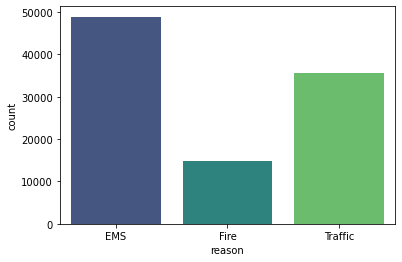

In [91]:
sns.countplot(x='reason', data=df, palette='viridis')

___
**Time Information**<br>
The data type of the objects in the timeStamp column

In [85]:
print(df['timeStamp'].dtypes)

object


The timestamps are still strings (objects). We are going to use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.

In [95]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

We can now grab specific attributes from a Datetime object by calling them. For example:

    time = df['timeStamp'].iloc[0]
    time.hour

We can use Jupyter's tab method to explore the various attributes. Now that the timestamp column are actually DateTime objects, we're going to use .apply() to create 3 new columns called Hour, Month, and Day of Week.

Notice how the Day of Week is an integer 0-6. We are using the .map() with 'dmap' dictionary to map the actual string names to the day of the week:

In [97]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Hour'] = df['timeStamp'].apply(lambda x:x.hour)
df['Day of Week'] = df['timeStamp'].apply(lambda x:x.day_of_week).map(dmap)
df['Month'] = df['timeStamp'].apply(lambda x:x.month)

In [98]:
df.head() # to check new columns

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Thu,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Thu,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,Thu,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,Thu,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,Thu,12


**Create a countplot of the Day of Week column with the hue based off of the reason column:**

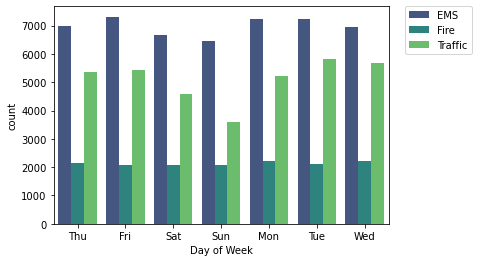

In [99]:
sns.countplot(x='Day of Week', data=df, hue='reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1),loc=0, borderaxespad=0.)

**The same for Month:**

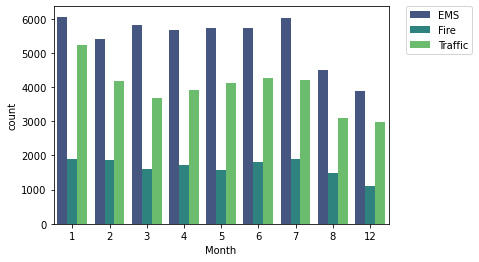

In [60]:
sns.countplot(x='Month', data=df, hue='reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0.)

_____

If we have noticed, the plot was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas

**Create a groupby object called 'byMonth' and it's visualizations**<br>
The DataFrame is grouping by the month column and using the `count()` method for aggregation

In [100]:
byMonth = df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


Create a simple plot of the dataframe indicating the count of calls per month

<AxesSubplot:xlabel='Month'>

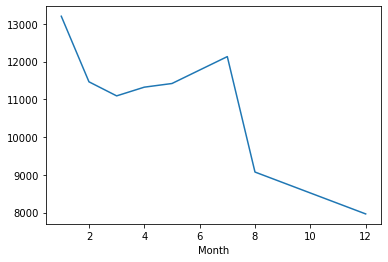

In [101]:
byMonth['twp'].plot()

Use seaborn's `lmplot()` to create a linear fit on the number of calls per month. In order to create `lmplot()`, we have to reset the index to a column

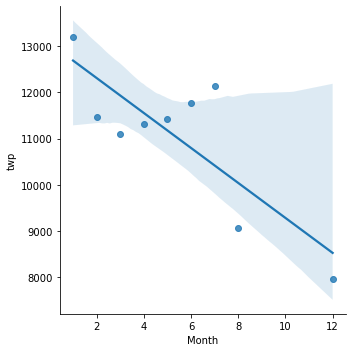

In [103]:
byMonth.reset_index(inplace=True)
sns.lmplot(x='Month', y='twp', data=byMonth)

**Create a new column called 'Date' that contains the date from 'timeStamp' column**

In [104]:
df['Date'] = df['timeStamp'].apply(lambda x:x.date())

Groupby Date column with the `count()` aggregate and create a plot of counts of 911 calls

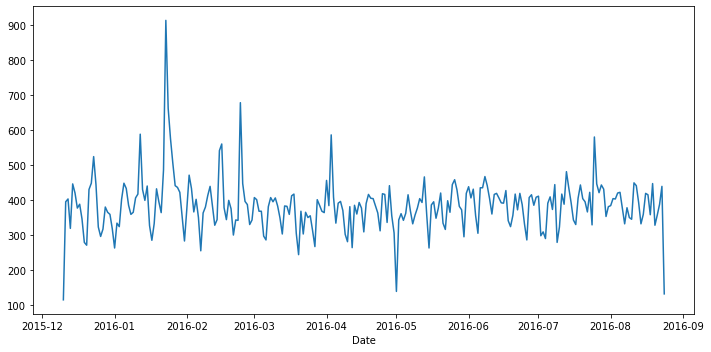

In [117]:
plt.figure(figsize=(10,5))
df.groupby('Date')['twp'].count().plot()
plt.tight_layout()

Recreate above plot but create 3 separate plots with each plot representing a reason for the 911 call

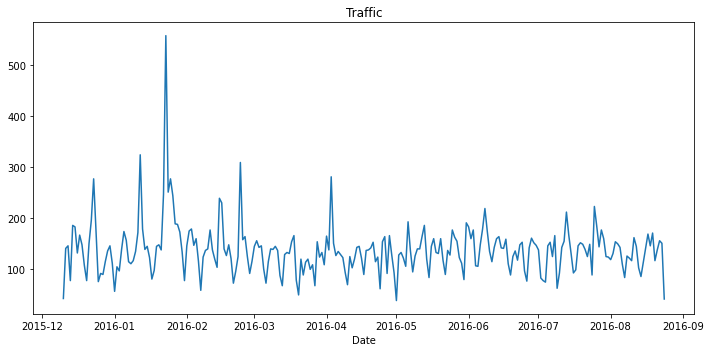

In [118]:
plt.figure(figsize=(10,5))
df[df['reason']=='Traffic'].groupby('Date')['twp'].count().plot()
plt.title('Traffic')
plt.tight_layout()

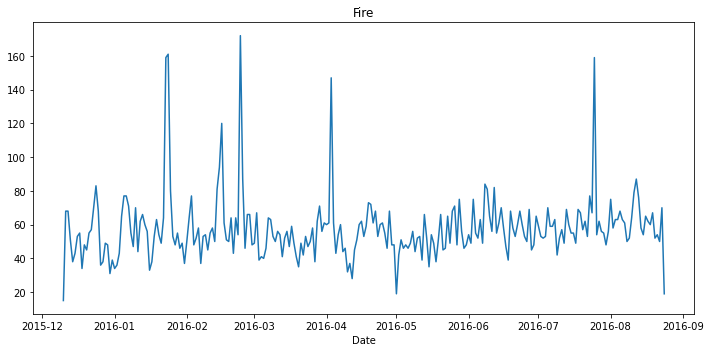

In [119]:
plt.figure(figsize=(10,5))
df[df['reason']=='Fire'].groupby('Date')['twp'].count().plot()
plt.title('Fire')
plt.tight_layout()

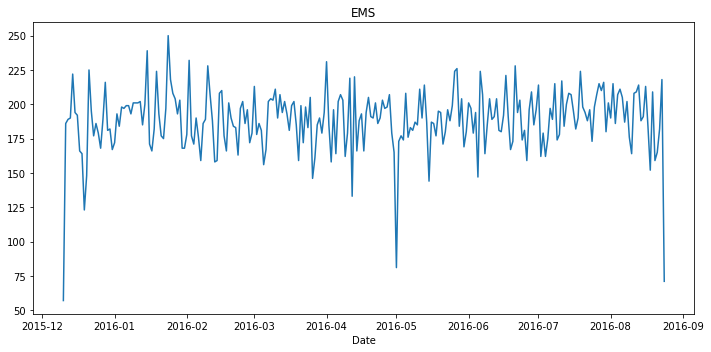

In [120]:
plt.figure(figsize=(10,5))
df[df['reason']=='EMS'].groupby('Date')['twp'].count().plot()
plt.title('EMS')
plt.tight_layout()

____
**Create heatmap and clustermap using restructured df dataframe**<br>
Now let's move on to creating heatmap with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but in this time, we'll going to use `pivot_table()` and use `aggfunc='count'`

In [124]:
dayHour = df.pivot_table(index='Day of Week', columns='Hour', values='twp', aggfunc='count')
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354


Create a clustermap using the dayHour dataframe

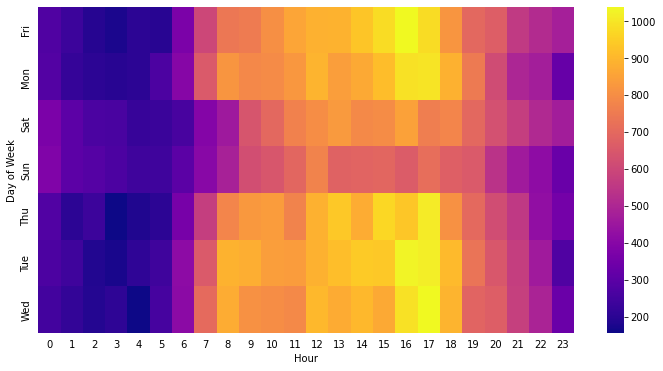

In [141]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dayHour, cmap='plasma').tick_params(left=False, bottom=False)

Create a clustermap using this dayHour DataFrame

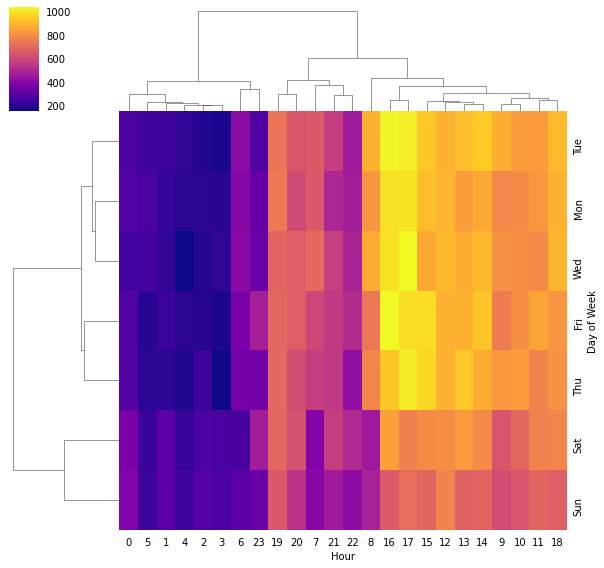

In [142]:
sns.clustermap(data=dayHour, cmap='plasma', figsize=(8.5,8)).tick_params(right=False, bottom=False)

Repeat these same plots and operations, for a dataframe that shows the Month as the column

In [129]:
dayMonth = df.pivot_table(index='Day of Week', columns='Month', values='twp', aggfunc='count')
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265


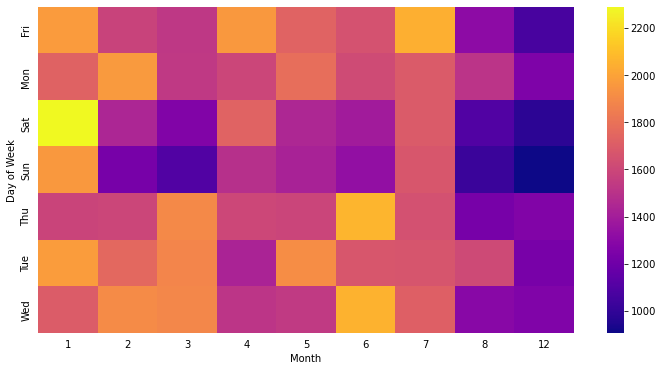

In [143]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dayMonth, cmap='plasma').tick_params(left=False, bottom=False)

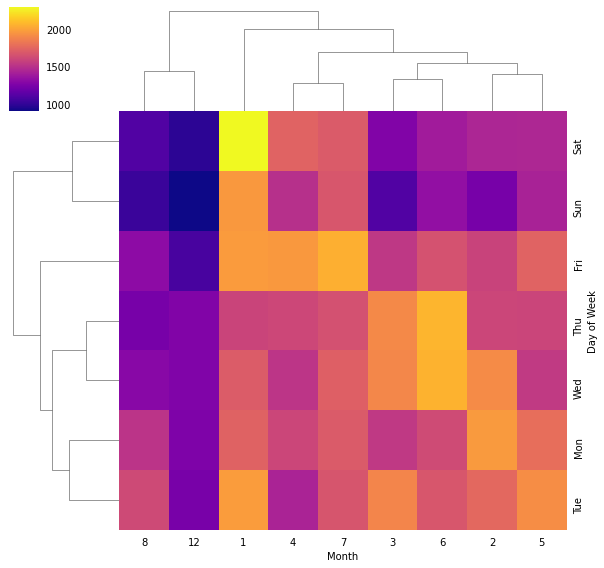

In [144]:
sns.clustermap(data=dayMonth, cmap='plasma', figsize=(8.5,8)).tick_params(right=False, bottom=False)

Thank you and please check out my next post.